In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head(20))

          Дата  Склад Контрагент Номенклатура  Количество
0   2018-01-04      1  address_0    product_0           4
1   2018-01-04      1  address_0    product_1           4
2   2018-01-04      1  address_0    product_2           5
3   2018-01-04      1  address_0    product_3          10
4   2018-01-04      1  address_0    product_4           2
5   2018-01-04      1  address_0    product_5           2
6   2018-01-04      1  address_0    product_6           0
7   2018-01-04      1  address_0    product_7           1
8   2018-01-04      1  address_0    product_8           1
9   2018-01-04      1  address_0    product_9           0
10  2018-01-04      1  address_0   product_10           2
11  2018-01-04      1  address_0   product_11           2
12  2018-01-04      1  address_0   product_12           3
13  2018-01-04      1  address_0   product_13           4
14  2018-01-04      1  address_0   product_14           2
15  2018-01-04      1  address_0   product_15           2
16  2018-01-04

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Дата          301355 non-null  object
 1   Склад         301355 non-null  int64 
 2   Контрагент    301355 non-null  object
 3   Номенклатура  301355 non-null  object
 4   Количество    301355 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ MB


In [4]:
print(df.shape)
print(df.columns)

(301355, 5)
Index(['Дата', 'Склад', 'Контрагент', 'Номенклатура', 'Количество'], dtype='object')


In [5]:
df.describe()

,Склад,Количество
count,301355.000000,301355.000000
mean,2.900652,2.951559
std,1.352221,2.998154
min,1.000000,0.000000
25%,2.000000,1.000000
50%,3.000000,2.000000
75%,4.000000,4.000000
max,5.000000,200.000000


Проверяем формат столбцов

In [7]:
print(df.dtypes)

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object


Сразу переведем столбец "Дата" в правильный формат

In [9]:
data = {'Дата':[],
        'Склад':[],
        'Контрагент':[],
        'Номенклатура':[],
        'Количество':[]}
df = pd.DataFrame(data)
df['Дата'] = pd.to_datetime(df['Дата'])
print(df.dtypes)

Дата            datetime64[ns]
Склад                  float64
Контрагент             float64
Номенклатура           float64
Количество             float64
dtype: object


Сгруппируйте данные по дате, посчитайте количество продаж

In [11]:
df = pd.read_csv('data.csv')
df['Дата'] = pd.to_datetime(df['Дата'])

grouped_df = df.groupby('Дата')['Количество'].sum().reset_index()
grouped_df

,Дата,Количество
0,2018-01-04,3734
1,2018-01-05,3643
2,2018-01-06,3193
3,2018-01-07,3298
4,2018-01-09,4055
...,...,...
200,2018-08-26,5302
201,2018-08-28,5983
202,2018-08-29,4969
203,2018-08-30,4648


Вывести несколько первых строк сгруппированных данных

In [13]:
print(grouped_df.head(20))

         Дата  Количество
0  2018-01-04        3734
1  2018-01-05        3643
2  2018-01-06        3193
3  2018-01-07        3298
4  2018-01-09        4055
5  2018-01-10        3653
6  2018-01-11        3176
7  2018-01-12        3092
8  2018-01-13        3294
9  2018-01-14        3228
10 2018-01-16        4310
11 2018-01-17        4004
12 2018-01-18        3759
13 2018-01-19        3688
14 2018-01-20        3697
15 2018-01-21        3508
16 2018-01-23        4528
17 2018-01-24        4076
18 2018-01-25        3868
19 2018-01-26        3650


Нарисуйте график продаж у `grouped_df`

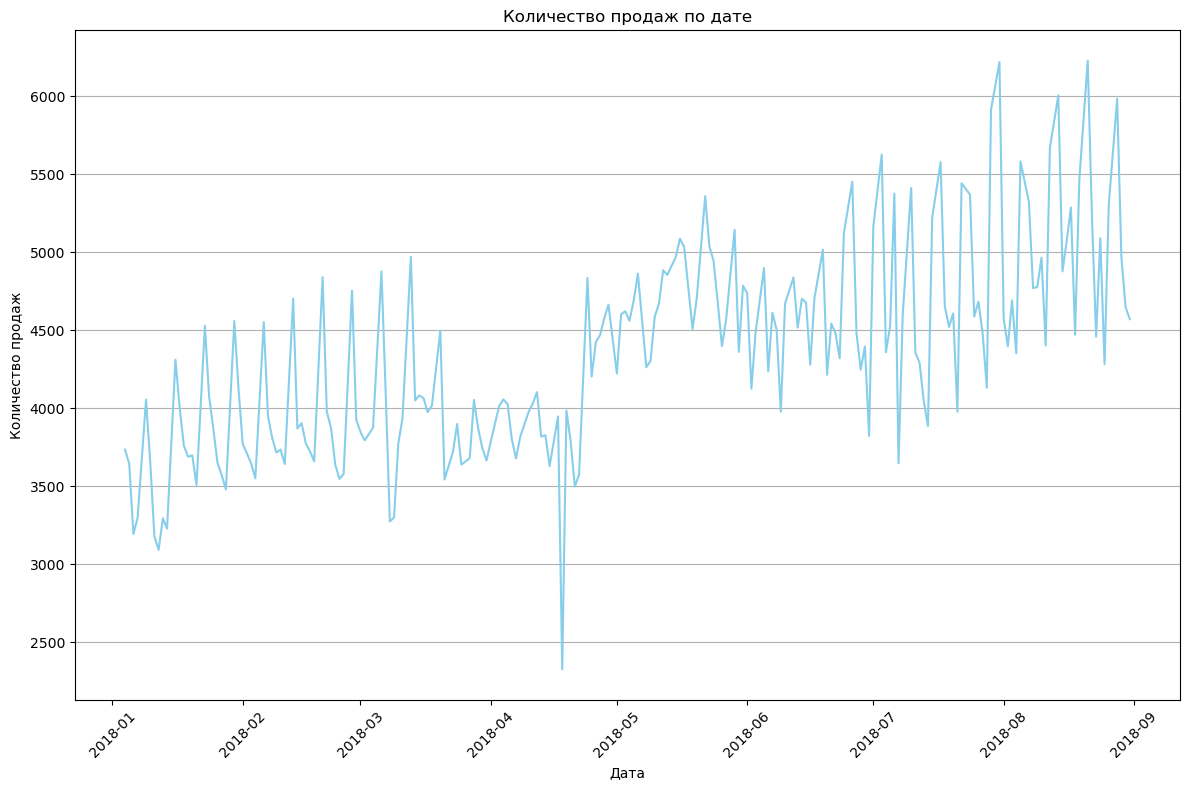

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(grouped_df['Дата'], grouped_df['Количество'], color='skyblue')
plt.title('Количество продаж по дате')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

In [17]:
max_value = grouped_df['Количество'].max()
min_value = grouped_df['Количество'].min()

print(f"Максимальное значение: {max_value}")
print(f"Минимальное значение: {min_value}")

max_row = grouped_df[grouped_df['Количество'] == max_value]
min_row = grouped_df[grouped_df['Количество'] == min_value]

print("\nСтроки с максимальным значением:")
print(max_row)

print("\nСтроки с минимальным значением:")
print(min_row)

Максимальное значение: 6226
Минимальное значение: 2326

Строки с максимальным значением:
          Дата  Количество
195 2018-08-21        6226

Строки с минимальным значением:
         Дата  Количество
88 2018-04-18        2326


In [18]:
mean_value = grouped_df['Количество'].mean()

# Вывод результата
print(f"Среднее значение по количеству: {mean_value:.2f}")

Среднее значение по количеству: 4338.86


In [19]:
unique_products_count = df['Номенклатура'].nunique()

# Вывод результата
print(f"Количество уникальных товаров: {unique_products_count}")

Количество уникальных товаров: 24


In [20]:
На графике представлена картина по количеству продаж различного продукта за 8 месяцев 2018 года, с января по август включительно. 
24 вида уникальных товаров. С января по середину марта продажи росли, с отметки 3700(примерно) до 4900(примерно) единиц в месяц. 
Далее до середины апреля, то есть, в течение одного месяца был значительный спад до минимума на отметке 2326 единиц. 
Далее продажи пошли выше и 21 августа было продано максимальное количество товара 6226 единиц. За весь период среднее значение по продажам 
составило 4339 единиц различного товара.

SyntaxError: invalid syntax (2878777023.py, line 1)

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [ ]:
Q1 = df['Количество'].quantile(0.25)
Q3 = df['Количество'].quantile(0.75)

# Вычисляем IQR
IQR = Q3 - Q1

# Определяем границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Находим выбросы
outliers = df[(df['Количество'] < lower_bound) | (df['Количество'] > upper_bound)]

# Проверяем наличие выбросов и находим максимальный выброс
if not outliers.empty:
    max_outlier_value = outliers['Количество'].max()
    max_outlier_row = outliers[outliers['Количество'] == max_outlier_value]
    print("Строка с максимальным выбросом:")
    print(max_outlier_row)
else:
    print("Нет выбросов.")

Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [ ]:
filtered_df = df[(df['Дата'].dt.month.isin([6, 7, 8])) & (df['Дата'].dt.weekday == 2)]

# Группировка по товару и суммирование количества
top_products = filtered_df.groupby('Номенклатура')['Количество'].sum().reset_index()

# Поиск топового товара
top_product = top_products.loc[top_products['Количество'].idxmax()]

print("Топовый товар по продажам за июнь, июль и август по средам:")
print(top_product)

Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [ ]:
pip install xlrd xlwt openpyxl 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

tf = pd.read_excel('weather.xls')

print(tf.head(20))

In [ ]:
print(tf.dtypes)

In [ ]:
tf.columns

In [ ]:
import pandas as pd

tf = pd.read_excel('weather.xls')
tf['Дата'] = pd.to_datetime(tf['Дата'])

grouped_tf = tf[['Дата', 'Tемпература']].groupby('Дата').mean().sort_values(by='Дата').reset_index()

grouped_tf.columns = ['Дата', 'Средняя Температура']

grouped_tf


In [ ]:
merged_tb = pd.merge(grouped_tf, grouped_df, on='Дата')
merged_tb

In [ ]:
index_check = merged_tb.index.isin(range(len(df)))

if all(index_check):
    print("Индексы совпадают.")
else:
    print("Индексы не совпадают.")

In [ ]:
print(len(merged_tb['Дата']))
print(len(merged_tb['Количество']))
print(len(merged_tb['Средняя Температура']))

In [ ]:
merged_tb_cleaned = merged_tb.dropna(subset=['Дата', 'Количество', 'Средняя Температура'])


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

if 'Дата' in merged_tb_cleaned.columns:
    merged_tb_cleaned.set_index('Дата', inplace=True)
    
fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.set_xlabel('Дата')
ax1.set_ylabel('Количество', color='tab:blue')
ax1.plot(merged_tb_cleaned.index, merged_tb_cleaned['Количество'], color='tab:blue', label='Количество', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Средняя Температура', color='tab:red')
ax2.plot(merged_tb_cleaned.index, merged_tb_cleaned['Средняя Температура'], color='tab:red', label='Температура', marker='o')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Продажи и Средняя Температура по Датам')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

fig.autofmt_xdate()

ax1.grid(True)

fig.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

if 'Дата' in merged_tb_cleaned.columns:
    merged_tb_cleaned.set_index('Дата', inplace=True)

plt.figure(figsize=(10, 8))
plt.plot(merged_tb_cleaned.index, merged_tb_cleaned['Средняя Температура'], color='tab:red', label='Температура', marker='o')
plt.xlabel('Дата')
plt.ylabel('Средняя Температура', color='tab:red')
plt.title('Средняя Температура по Датам')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
